In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


from prophet import Prophet
from xgboost import XGBRegressor

In [272]:
pip install darts

Note: you may need to restart the kernel to use updated packages.


In [273]:

pip install backtest

Note: you may need to restart the kernel to use updated packages.


In [5]:
df1=pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2014.csv')

In [6]:
df2 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2015.csv')

In [7]:
df3 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2016.csv')

In [8]:
df4 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2017.csv')

In [9]:
df5 =  pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2018.csv')

In [10]:
df6 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2019.csv')

In [11]:
df7 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2020.csv')

In [12]:
df8 =pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2021.csv')

In [13]:
df9 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2022.csv')

In [14]:
sandiego_df1 = df1[(df1['fips_code'] == 6073) & (df1['county'] == 'San Diego')]

In [15]:
sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\2952790455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])


In [16]:
# Convert run_start_time to datetime format
sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df1.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\1902342349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df1['run_start_time'] = pd.to_datetime(sandiego_df1['run_start_time'])


In [17]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego1 = sandiego_df1.resample('D')['sum'].max()

In [18]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df1 = daily_max_outages_san_diego1.to_frame().reset_index()

In [19]:
# Rename the columns for clarity
daily_max_outages_san_diego_df1.columns = ['Date', 'Highest_Outage']

In [20]:

print(daily_max_outages_san_diego_df1)

         Date  Highest_Outage
0  2014-11-01            3191
1  2014-11-02             251
2  2014-11-03             205
3  2014-11-04             659
4  2014-11-05            1769
..        ...             ...
56 2014-12-27            4212
57 2014-12-28             226
58 2014-12-29            1699
59 2014-12-30            1593
60 2014-12-31            1593

[61 rows x 2 columns]


In [21]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego1 = sandiego_df1.resample('H')['sum'].max()

In [22]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df1 = hourly_max_outages_san_diego1.to_frame().reset_index()

In [23]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df1.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df1)

                    Date  Highest_Outage
0    2014-11-01 06:00:00           377.0
1    2014-11-01 07:00:00             NaN
2    2014-11-01 08:00:00             NaN
3    2014-11-01 09:00:00             NaN
4    2014-11-01 10:00:00             NaN
...                  ...             ...
1430 2014-12-30 20:00:00           185.0
1431 2014-12-30 21:00:00           177.0
1432 2014-12-30 22:00:00           134.0
1433 2014-12-30 23:00:00          1593.0
1434 2014-12-31 00:00:00          1593.0

[1435 rows x 2 columns]


In [24]:
hourly_max_outages_san_diego1 = hourly_max_outages_san_diego_df1.fillna(0)

In [25]:
hourly_max_outages_san_diego1

,Date,Highest_Outage
0,2014-11-01 06:00:00,377.0
1,2014-11-01 07:00:00,0.0
2,2014-11-01 08:00:00,0.0
3,2014-11-01 09:00:00,0.0
4,2014-11-01 10:00:00,0.0
...,...,...
1430,2014-12-30 20:00:00,185.0
1431,2014-12-30 21:00:00,177.0
1432,2014-12-30 22:00:00,134.0
1433,2014-12-30 23:00:00,1593.0


In [26]:
sandiego_df2 = df2[(df2['fips_code'] == 6073) & (df2['county'] == 'San Diego')]

In [27]:
# Convert run_start_time to datetime format
sandiego_df2['run_start_time'] = pd.to_datetime(sandiego_df2['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df2.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\4224898449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df2['run_start_time'] = pd.to_datetime(sandiego_df2['run_start_time'])


In [28]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego2 = sandiego_df2.resample('D')['sum'].max()

In [29]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df2 = daily_max_outages_san_diego2.to_frame().reset_index()

In [30]:
# Rename the columns for clarity
daily_max_outages_san_diego_df2.columns = ['Date', 'Highest_Outage']

In [31]:

print(daily_max_outages_san_diego_df2)

          Date  Highest_Outage
0   2015-01-01          4432.0
1   2015-01-02          1718.0
2   2015-01-03           385.0
3   2015-01-04          1091.0
4   2015-01-05          1258.0
..         ...             ...
360 2015-12-27           975.0
361 2015-12-28          1066.0
362 2015-12-29           292.0
363 2015-12-30          4989.0
364 2015-12-31           112.0

[365 rows x 2 columns]


In [32]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego2= sandiego_df2.resample('H')['sum'].max()

In [33]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df2 = hourly_max_outages_san_diego2.to_frame().reset_index()

In [34]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df2.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df2)

                    Date  Highest_Outage
0    2015-01-01 05:00:00           126.0
1    2015-01-01 06:00:00           126.0
2    2015-01-01 07:00:00             2.0
3    2015-01-01 08:00:00             NaN
4    2015-01-01 09:00:00             NaN
...                  ...             ...
8727 2015-12-30 20:00:00           178.0
8728 2015-12-30 21:00:00           195.0
8729 2015-12-30 22:00:00           178.0
8730 2015-12-30 23:00:00           112.0
8731 2015-12-31 00:00:00           112.0

[8732 rows x 2 columns]


In [35]:
hourly_max_outages_san_diego2 = hourly_max_outages_san_diego_df2.fillna(0)

In [36]:
hourly_max_outages_san_diego2

,Date,Highest_Outage
0,2015-01-01 05:00:00,126.0
1,2015-01-01 06:00:00,126.0
2,2015-01-01 07:00:00,2.0
3,2015-01-01 08:00:00,0.0
4,2015-01-01 09:00:00,0.0
...,...,...
8727,2015-12-30 20:00:00,178.0
8728,2015-12-30 21:00:00,195.0
8729,2015-12-30 22:00:00,178.0
8730,2015-12-30 23:00:00,112.0


In [37]:
sandiego_df3 = df3[(df3['fips_code'] == 6073) & (df3['county'] == 'San Diego')]

In [38]:
# Convert run_start_time to datetime format
sandiego_df3['run_start_time'] = pd.to_datetime(sandiego_df3['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df3.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\3611938441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df3['run_start_time'] = pd.to_datetime(sandiego_df3['run_start_time'])


In [39]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego3 = sandiego_df3.resample('D')['sum'].max()

In [40]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df3 = daily_max_outages_san_diego3.to_frame().reset_index()

In [41]:
# Rename the columns for clarity
daily_max_outages_san_diego_df3.columns = ['Date', 'Highest_Outage']

In [42]:

print(daily_max_outages_san_diego_df3)

          Date  Highest_Outage
0   2016-01-01            4176
1   2016-01-02            1922
2   2016-01-03             618
3   2016-01-04             316
4   2016-01-05            6054
..         ...             ...
360 2016-12-26           10763
361 2016-12-27             899
362 2016-12-28            3420
363 2016-12-29             434
364 2016-12-30            2713

[365 rows x 2 columns]


In [43]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego3= sandiego_df3.resample('H')['sum'].max()

In [44]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df3 = hourly_max_outages_san_diego3.to_frame().reset_index()

In [45]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df3.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df3)

                    Date  Highest_Outage
0    2016-01-01 18:00:00             1.0
1    2016-01-01 19:00:00             1.0
2    2016-01-01 20:00:00             1.0
3    2016-01-01 21:00:00             1.0
4    2016-01-01 22:00:00          1422.0
...                  ...             ...
8735 2016-12-30 17:00:00           539.0
8736 2016-12-30 18:00:00          2493.0
8737 2016-12-30 19:00:00            43.0
8738 2016-12-30 20:00:00            20.0
8739 2016-12-30 21:00:00            20.0

[8740 rows x 2 columns]


In [46]:
hourly_max_outages_san_diego3 = hourly_max_outages_san_diego_df3.fillna(0)

In [47]:
hourly_max_outages_san_diego3

,Date,Highest_Outage
0,2016-01-01 18:00:00,1.0
1,2016-01-01 19:00:00,1.0
2,2016-01-01 20:00:00,1.0
3,2016-01-01 21:00:00,1.0
4,2016-01-01 22:00:00,1422.0
...,...,...
8735,2016-12-30 17:00:00,539.0
8736,2016-12-30 18:00:00,2493.0
8737,2016-12-30 19:00:00,43.0
8738,2016-12-30 20:00:00,20.0


In [48]:
sandiego_df4 = df4[(df4['fips_code'] == 6073) & (df4['county'] == 'San Diego')]

In [49]:
# Convert run_start_time to datetime format
sandiego_df4['run_start_time'] = pd.to_datetime(sandiego_df4['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df4.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\3543013722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df4['run_start_time'] = pd.to_datetime(sandiego_df4['run_start_time'])


In [50]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego4 = sandiego_df4.resample('D')['sum'].max()

In [51]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df4 = daily_max_outages_san_diego4.to_frame().reset_index()

In [52]:
# Rename the columns for clarity
daily_max_outages_san_diego_df4.columns = ['Date', 'Highest_Outage']

In [53]:
print(daily_max_outages_san_diego_df4)

          Date  Highest_Outage
0   2017-01-01          2516.0
1   2017-01-02           358.0
2   2017-01-03           487.0
3   2017-01-04          3094.0
4   2017-01-05           372.0
..         ...             ...
360 2017-12-27           154.0
361 2017-12-28           168.0
362 2017-12-29           433.0
363 2017-12-30            92.0
364 2017-12-31             1.0

[365 rows x 2 columns]


In [54]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego4= sandiego_df4.resample('H')['sum'].max()

In [55]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df4 = hourly_max_outages_san_diego4.to_frame().reset_index()

In [56]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df4.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df4)

                    Date  Highest_Outage
0    2017-01-01 00:00:00           412.0
1    2017-01-01 01:00:00          2516.0
2    2017-01-01 02:00:00          1634.0
3    2017-01-01 03:00:00          1634.0
4    2017-01-01 04:00:00           213.0
...                  ...             ...
8732 2017-12-30 20:00:00             7.0
8733 2017-12-30 21:00:00             7.0
8734 2017-12-30 22:00:00             1.0
8735 2017-12-30 23:00:00             1.0
8736 2017-12-31 00:00:00             1.0

[8737 rows x 2 columns]


In [57]:
hourly_max_outages_san_diego4 = hourly_max_outages_san_diego_df4.fillna(0)

In [58]:
hourly_max_outages_san_diego4

,Date,Highest_Outage
0,2017-01-01 00:00:00,412.0
1,2017-01-01 01:00:00,2516.0
2,2017-01-01 02:00:00,1634.0
3,2017-01-01 03:00:00,1634.0
4,2017-01-01 04:00:00,213.0
...,...,...
8732,2017-12-30 20:00:00,7.0
8733,2017-12-30 21:00:00,7.0
8734,2017-12-30 22:00:00,1.0
8735,2017-12-30 23:00:00,1.0


In [59]:
sandiego_df5 = df5[(df5['fips_code'] == 6073) & (df5['county'] == 'San Diego')]

In [60]:
# Convert run_start_time to datetime format
sandiego_df5['run_start_time'] = pd.to_datetime(sandiego_df5['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df5.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\4223640805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df5['run_start_time'] = pd.to_datetime(sandiego_df5['run_start_time'])


In [61]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego5 = sandiego_df5.resample('D')['sum'].max()

In [62]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df5 = daily_max_outages_san_diego5.to_frame().reset_index()

In [63]:
# Rename the columns for clarity
daily_max_outages_san_diego_df5.columns = ['Date', 'Highest_Outage']

In [64]:
print(daily_max_outages_san_diego_df5)

          Date  Highest_Outage
0   2018-01-01          1149.0
1   2018-01-02           325.0
2   2018-01-03          1476.0
3   2018-01-04          1977.0
4   2018-01-05          1858.0
..         ...             ...
360 2018-12-27           449.0
361 2018-12-28          3353.0
362 2018-12-29           686.0
363 2018-12-30            50.0
364 2018-12-31             6.0

[365 rows x 2 columns]


In [65]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego5= sandiego_df5.resample('H')['sum'].max()

In [66]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df5 = hourly_max_outages_san_diego5.to_frame().reset_index()

In [67]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df5.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df5)

                    Date  Highest_Outage
0    2018-01-01 05:00:00          1149.0
1    2018-01-01 06:00:00          1149.0
2    2018-01-01 07:00:00          1149.0
3    2018-01-01 08:00:00          1149.0
4    2018-01-01 09:00:00           399.0
...                  ...             ...
8727 2018-12-30 20:00:00             6.0
8728 2018-12-30 21:00:00             6.0
8729 2018-12-30 22:00:00             6.0
8730 2018-12-30 23:00:00             6.0
8731 2018-12-31 00:00:00             6.0

[8732 rows x 2 columns]


In [68]:
hourly_max_outages_san_diego5 = hourly_max_outages_san_diego_df5.fillna(0)

In [69]:
hourly_max_outages_san_diego5

,Date,Highest_Outage
0,2018-01-01 05:00:00,1149.0
1,2018-01-01 06:00:00,1149.0
2,2018-01-01 07:00:00,1149.0
3,2018-01-01 08:00:00,1149.0
4,2018-01-01 09:00:00,399.0
...,...,...
8727,2018-12-30 20:00:00,6.0
8728,2018-12-30 21:00:00,6.0
8729,2018-12-30 22:00:00,6.0
8730,2018-12-30 23:00:00,6.0


In [70]:
sandiego_df6 = df6[(df6['fips_code'] == 6073) & (df6['county'] == 'San Diego')]

In [71]:
# Convert run_start_time to datetime format
sandiego_df6['run_start_time'] = pd.to_datetime(sandiego_df6['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df6.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\2072086472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df6['run_start_time'] = pd.to_datetime(sandiego_df6['run_start_time'])


In [72]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego6 = sandiego_df6.resample('D')['sum'].max()

In [73]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df6 = daily_max_outages_san_diego6.to_frame().reset_index()

In [74]:
# Rename the columns for clarity
daily_max_outages_san_diego_df6.columns = ['Date', 'Highest_Outage']

In [75]:
print(daily_max_outages_san_diego_df6)

          Date  Highest_Outage
0   2019-01-01           259.0
1   2019-01-02           352.0
2   2019-01-03          4829.0
3   2019-01-04          1208.0
4   2019-01-05           788.0
..         ...             ...
359 2019-12-26          6696.0
360 2019-12-27           576.0
361 2019-12-28           655.0
362 2019-12-29          2911.0
363 2019-12-30           732.0

[364 rows x 2 columns]


In [76]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego6= sandiego_df6.resample('H')['sum'].max()

In [77]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df6 = hourly_max_outages_san_diego6.to_frame().reset_index()

In [78]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df6.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df6)

                    Date  Highest_Outage
0    2019-01-01 06:00:00           133.0
1    2019-01-01 07:00:00             NaN
2    2019-01-01 08:00:00             NaN
3    2019-01-01 09:00:00             NaN
4    2019-01-01 10:00:00             NaN
...                  ...             ...
8723 2019-12-30 17:00:00           409.0
8724 2019-12-30 18:00:00           409.0
8725 2019-12-30 19:00:00            47.0
8726 2019-12-30 20:00:00            15.0
8727 2019-12-30 21:00:00             7.0

[8728 rows x 2 columns]


In [79]:
hourly_max_outages_san_diego6 = hourly_max_outages_san_diego_df6.fillna(0)

In [80]:
hourly_max_outages_san_diego6

,Date,Highest_Outage
0,2019-01-01 06:00:00,133.0
1,2019-01-01 07:00:00,0.0
2,2019-01-01 08:00:00,0.0
3,2019-01-01 09:00:00,0.0
4,2019-01-01 10:00:00,0.0
...,...,...
8723,2019-12-30 17:00:00,409.0
8724,2019-12-30 18:00:00,409.0
8725,2019-12-30 19:00:00,47.0
8726,2019-12-30 20:00:00,15.0


In [81]:
sandiego_df7 = df7[(df7['fips_code'] == 6073) & (df7['county'] == 'San Diego')]

In [82]:
# Convert run_start_time to datetime format
sandiego_df7['run_start_time'] = pd.to_datetime(sandiego_df7['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df7.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\1624955678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df7['run_start_time'] = pd.to_datetime(sandiego_df7['run_start_time'])


In [83]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego7 = sandiego_df7.resample('D')['sum'].max()

In [84]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df7 = daily_max_outages_san_diego7.to_frame().reset_index()

In [85]:
# Rename the columns for clarity
daily_max_outages_san_diego_df7.columns = ['Date', 'Highest_Outage']

In [86]:
print(daily_max_outages_san_diego_df7)

          Date  Highest_Outage
0   2020-01-01          5303.0
1   2020-01-02          3745.0
2   2020-01-03          2028.0
3   2020-01-04           157.0
4   2020-01-05          1562.0
..         ...             ...
361 2020-12-27          2146.0
362 2020-12-28          3291.0
363 2020-12-29          5580.0
364 2020-12-30          2354.0
365 2020-12-31             6.0

[366 rows x 2 columns]


In [87]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego7= sandiego_df7.resample('H')['sum'].max()

In [88]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df7 = hourly_max_outages_san_diego7.to_frame().reset_index()

In [89]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df7.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df7)

                    Date  Highest_Outage
0    2020-01-01 00:00:00           606.0
1    2020-01-01 01:00:00           606.0
2    2020-01-01 02:00:00          1504.0
3    2020-01-01 03:00:00           606.0
4    2020-01-01 04:00:00           606.0
...                  ...             ...
8756 2020-12-30 20:00:00            46.0
8757 2020-12-30 21:00:00            40.0
8758 2020-12-30 22:00:00            30.0
8759 2020-12-30 23:00:00             6.0
8760 2020-12-31 00:00:00             6.0

[8761 rows x 2 columns]


In [90]:
hourly_max_outages_san_diego7 = hourly_max_outages_san_diego_df7.fillna(0)

In [91]:
hourly_max_outages_san_diego7

,Date,Highest_Outage
0,2020-01-01 00:00:00,606.0
1,2020-01-01 01:00:00,606.0
2,2020-01-01 02:00:00,1504.0
3,2020-01-01 03:00:00,606.0
4,2020-01-01 04:00:00,606.0
...,...,...
8756,2020-12-30 20:00:00,46.0
8757,2020-12-30 21:00:00,40.0
8758,2020-12-30 22:00:00,30.0
8759,2020-12-30 23:00:00,6.0


In [92]:
sandiego_df8 = df8[(df8['fips_code'] == 6073) & (df8['county'] == 'San Diego')]

In [93]:
# Convert run_start_time to datetime format
sandiego_df8['run_start_time'] = pd.to_datetime(sandiego_df8['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df8.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\809091036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df8['run_start_time'] = pd.to_datetime(sandiego_df8['run_start_time'])


In [94]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego8 = sandiego_df8.resample('D')['sum'].max()

In [95]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df8 = daily_max_outages_san_diego8.to_frame().reset_index()

In [96]:
# Rename the columns for clarity
daily_max_outages_san_diego_df8.columns = ['Date', 'Highest_Outage']

In [97]:
print(daily_max_outages_san_diego_df8)

          Date  Highest_Outage
0   2021-01-01          1122.0
1   2021-01-02           384.0
2   2021-01-03            10.0
3   2021-01-04          2625.0
4   2021-01-05          2976.0
..         ...             ...
360 2021-12-27          3039.0
361 2021-12-28          3687.0
362 2021-12-29          1771.0
363 2021-12-30           655.0
364 2021-12-31             5.0

[365 rows x 2 columns]


In [98]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego8= sandiego_df8.resample('H')['sum'].max()

In [99]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df8 = hourly_max_outages_san_diego8.to_frame().reset_index()

In [100]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df8.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df8)

                    Date  Highest_Outage
0    2021-01-01 00:00:00          1122.0
1    2021-01-01 01:00:00           359.0
2    2021-01-01 02:00:00             1.0
3    2021-01-01 03:00:00             1.0
4    2021-01-01 04:00:00             1.0
...                  ...             ...
8732 2021-12-30 20:00:00            75.0
8733 2021-12-30 21:00:00            18.0
8734 2021-12-30 22:00:00             1.0
8735 2021-12-30 23:00:00             5.0
8736 2021-12-31 00:00:00             5.0

[8737 rows x 2 columns]


In [101]:
hourly_max_outages_san_diego8= hourly_max_outages_san_diego_df8.fillna(0)

In [102]:
hourly_max_outages_san_diego8

,Date,Highest_Outage
0,2021-01-01 00:00:00,1122.0
1,2021-01-01 01:00:00,359.0
2,2021-01-01 02:00:00,1.0
3,2021-01-01 03:00:00,1.0
4,2021-01-01 04:00:00,1.0
...,...,...
8732,2021-12-30 20:00:00,75.0
8733,2021-12-30 21:00:00,18.0
8734,2021-12-30 22:00:00,1.0
8735,2021-12-30 23:00:00,5.0


In [103]:
sandiego_df9 = df9[(df9['fips_code'] == 6073) & (df9['county'] == 'San Diego')]

In [104]:
# Convert run_start_time to datetime format
sandiego_df9['run_start_time'] = pd.to_datetime(sandiego_df9['run_start_time'])

# Set the run_start_time column as the DataFrame index
sandiego_df9.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\758513731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sandiego_df9['run_start_time'] = pd.to_datetime(sandiego_df9['run_start_time'])


In [105]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_san_diego9 = sandiego_df9.resample('D')['sum'].max()

In [106]:
# Create a new DataFrame from the resampled data
daily_max_outages_san_diego_df9 = daily_max_outages_san_diego9.to_frame().reset_index()

In [107]:
# Rename the columns for clarity
daily_max_outages_san_diego_df9.columns = ['Date', 'Highest_Outage']

In [108]:
print(daily_max_outages_san_diego_df9)

          Date  Highest_Outage
0   2022-01-01          1416.0
1   2022-01-02           712.0
2   2022-01-03           750.0
3   2022-01-04          1624.0
4   2022-01-05          2144.0
..         ...             ...
311 2022-11-08          4974.0
312 2022-11-09          1038.0
313 2022-11-10           682.0
314 2022-11-11          1778.0
315 2022-11-12            25.0

[316 rows x 2 columns]


In [109]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_san_diego9= sandiego_df9.resample('H')['sum'].max()

In [110]:
# Create a new DataFrame from the resampled data
hourly_max_outages_san_diego_df9 = hourly_max_outages_san_diego9.to_frame().reset_index()

In [111]:
# Rename the columns for clarity
hourly_max_outages_san_diego_df9.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_san_diego_df9)

                    Date  Highest_Outage
0    2022-01-01 00:00:00            85.0
1    2022-01-01 01:00:00            85.0
2    2022-01-01 02:00:00            19.0
3    2022-01-01 03:00:00            19.0
4    2022-01-01 04:00:00          1416.0
...                  ...             ...
7574 2022-11-12 14:00:00             NaN
7575 2022-11-12 15:00:00            22.0
7576 2022-11-12 16:00:00            25.0
7577 2022-11-12 17:00:00            25.0
7578 2022-11-12 18:00:00            25.0

[7579 rows x 2 columns]


In [112]:
hourly_max_outages_san_diego9= hourly_max_outages_san_diego_df9.fillna(0)

In [113]:
hourly_max_outages_san_diego9

,Date,Highest_Outage
0,2022-01-01 00:00:00,85.0
1,2022-01-01 01:00:00,85.0
2,2022-01-01 02:00:00,19.0
3,2022-01-01 03:00:00,19.0
4,2022-01-01 04:00:00,1416.0
...,...,...
7574,2022-11-12 14:00:00,0.0
7575,2022-11-12 15:00:00,22.0
7576,2022-11-12 16:00:00,25.0
7577,2022-11-12 17:00:00,25.0


In [114]:
df_final = pd.concat([hourly_max_outages_san_diego1,hourly_max_outages_san_diego2,hourly_max_outages_san_diego3,hourly_max_outages_san_diego4,hourly_max_outages_san_diego5,hourly_max_outages_san_diego6,hourly_max_outages_san_diego7,hourly_max_outages_san_diego8,hourly_max_outages_san_diego9])

In [115]:
df_final

,Date,Highest_Outage
0,2014-11-01 06:00:00,377.0
1,2014-11-01 07:00:00,0.0
2,2014-11-01 08:00:00,0.0
3,2014-11-01 09:00:00,0.0
4,2014-11-01 10:00:00,0.0
...,...,...
7574,2022-11-12 14:00:00,0.0
7575,2022-11-12 15:00:00,22.0
7576,2022-11-12 16:00:00,25.0
7577,2022-11-12 17:00:00,25.0


In [116]:
d_final= pd.concat([daily_max_outages_san_diego_df1,daily_max_outages_san_diego_df2,daily_max_outages_san_diego_df3,daily_max_outages_san_diego_df4,daily_max_outages_san_diego_df5,daily_max_outages_san_diego_df6,daily_max_outages_san_diego_df7,daily_max_outages_san_diego_df8,daily_max_outages_san_diego_df9])

In [113]:
# Convert run_start_time to datetime format
df_final['Date'] = pd.to_datetime(df_final['Date'])

# Set the run_start_time column as the DataFrame index
df_final.set_index('Date', inplace=True)

In [117]:
d_final

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
311,2022-11-08,4974.0
312,2022-11-09,1038.0
313,2022-11-10,682.0
314,2022-11-11,1778.0


In [118]:
df_final

,Date,Highest_Outage
0,2014-11-01 06:00:00,377.0
1,2014-11-01 07:00:00,0.0
2,2014-11-01 08:00:00,0.0
3,2014-11-01 09:00:00,0.0
4,2014-11-01 10:00:00,0.0
...,...,...
7574,2022-11-12 14:00:00,0.0
7575,2022-11-12 15:00:00,22.0
7576,2022-11-12 16:00:00,25.0
7577,2022-11-12 17:00:00,25.0


In [4]:
pip install --upgrade transformers

Note: you may need to restart the kernel to use updated packages.


In [120]:
df = df_final.sort_index()

In [121]:
df

,Date,Highest_Outage
0,2014-11-01 06:00:00,377.0
0,2017-01-01 00:00:00,412.0
0,2019-01-01 06:00:00,133.0
0,2020-01-01 00:00:00,606.0
0,2016-01-01 18:00:00,1.0
...,...,...
8756,2020-12-30 20:00:00,46.0
8757,2020-12-30 21:00:00,40.0
8758,2020-12-30 22:00:00,30.0
8759,2020-12-30 23:00:00,6.0


In [225]:
df=df.reset_index()

In [226]:
# Convert the "run_start_time" column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column 'date' containing only the date part of 'run_start_time'
df['date'] = df['Date'].dt.date

In [227]:
df

,index,Date,Highest_Outage,date
0,0,2014-11-01 06:00:00,377.0,2014-11-01
1,0,2017-01-01 00:00:00,412.0,2017-01-01
2,0,2019-01-01 06:00:00,133.0,2019-01-01
3,0,2020-01-01 00:00:00,606.0,2020-01-01
4,0,2016-01-01 18:00:00,1.0,2016-01-01
...,...,...,...,...
70176,8756,2020-12-30 20:00:00,46.0,2020-12-30
70177,8757,2020-12-30 21:00:00,40.0,2020-12-30
70178,8758,2020-12-30 22:00:00,30.0,2020-12-30
70179,8759,2020-12-30 23:00:00,6.0,2020-12-30


In [228]:
# Create a new column 'date' containing only the date part of 'run_start_time'
df['date'] = df['Date'].dt.date

In [229]:
df

,index,Date,Highest_Outage,date
0,0,2014-11-01 06:00:00,377.0,2014-11-01
1,0,2017-01-01 00:00:00,412.0,2017-01-01
2,0,2019-01-01 06:00:00,133.0,2019-01-01
3,0,2020-01-01 00:00:00,606.0,2020-01-01
4,0,2016-01-01 18:00:00,1.0,2016-01-01
...,...,...,...,...
70176,8756,2020-12-30 20:00:00,46.0,2020-12-30
70177,8757,2020-12-30 21:00:00,40.0,2020-12-30
70178,8758,2020-12-30 22:00:00,30.0,2020-12-30
70179,8759,2020-12-30 23:00:00,6.0,2020-12-30


# Group by 'date' and find the maximum 'Highest_Outage' for each day
day_max_outages =df.groupby('date')['Highest_Outage'].max()

# Create a new DataFrame from the grouped data
day_max_outages_df = day_max_outages.reset_index()

print(day_max_outages_df)

In [122]:
df_grouped=d_final

In [123]:
# Convert run_start_time to datetime format
df_grouped['Date'] = pd.to_datetime(df_grouped['Date'])

# Set the run_start_time column as the DataFrame index
df_grouped.set_index('Date', inplace=True)

In [124]:
df_grouped

,Highest_Outage
Date,
2014-11-01,3191.0
2014-11-02,251.0
2014-11-03,205.0
2014-11-04,659.0
2014-11-05,1769.0
...,...
2022-11-08,4974.0
2022-11-09,1038.0
2022-11-10,682.0


In [125]:
df1=df_grouped

In [126]:
series=df1.squeeze()

In [127]:
df1=df1.reset_index()

In [128]:
print(series)

Date
2014-11-01    3191.0
2014-11-02     251.0
2014-11-03     205.0
2014-11-04     659.0
2014-11-05    1769.0
               ...  
2022-11-08    4974.0
2022-11-09    1038.0
2022-11-10     682.0
2022-11-11    1778.0
2022-11-12      25.0
Name: Highest_Outage, Length: 2932, dtype: float64


In [129]:
df1

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
2927,2022-11-08,4974.0
2928,2022-11-09,1038.0
2929,2022-11-10,682.0
2930,2022-11-11,1778.0


In [130]:
dfd=d_final


In [131]:
dfd

,Highest_Outage
Date,
2014-11-01,3191.0
2014-11-02,251.0
2014-11-03,205.0
2014-11-04,659.0
2014-11-05,1769.0
...,...
2022-11-08,4974.0
2022-11-09,1038.0
2022-11-10,682.0


In [132]:
df=dfd

In [134]:
df=df.reset_index()

In [135]:
df

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
2927,2022-11-08,4974.0
2928,2022-11-09,1038.0
2929,2022-11-10,682.0
2930,2022-11-11,1778.0


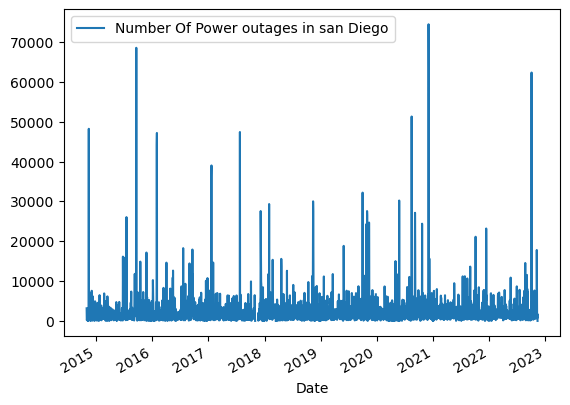

In [136]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline
series.plot(label="Number Of Power outages in san Diego")
plt.legend();

In [137]:
from darts.dataprocessing.transformers import Scaler

In [243]:
df=df.reset_index()

In [138]:
scalerp=Scaler()

In [139]:
import pandas as pd
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

In [140]:



# Convert the 'date' column to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Set 'date' as the index
df1.set_index('Date', inplace=True)

# Ensure 'Highest_Outage' contains only numeric values and replace NaN with 0
df1['Highest_Outage'] = pd.to_numeric(df1['Highest_Outage'], errors='coerce').fillna(0)

# Create a TimeSeries object from the 'Highest_Outage' column, inferring the frequency
series = TimeSeries.from_dataframe(df1, fill_missing_dates=True, freq='D')

print(series)



<TimeSeries (DataArray) (Date: 2934, component: 1, sample: 1)>
array([[[3191.]],

       [[ 251.]],

       [[ 205.]],

       ...,

       [[ 682.]],

       [[1778.]],

       [[  25.]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2014-11-01 2014-11-02 ... 2022-11-12
  * component  (component) object 'Highest_Outage'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [141]:
series_scaled = scalerp.fit_transform(series)

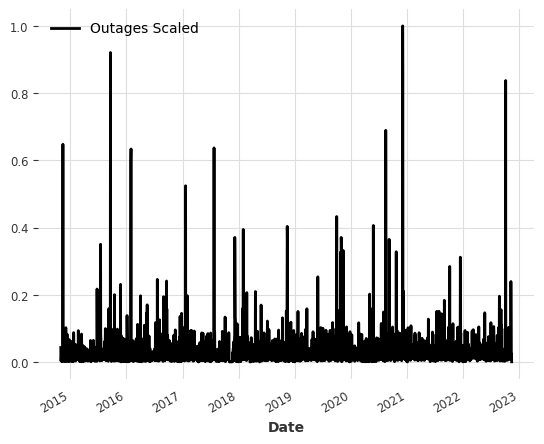

In [142]:
# plottingair_ds.plot(label="Number Of Passengers")
series_scaled.plot(label = "Outages Scaled")

plt.legend();

In [143]:
df

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
2927,2022-11-08,4974.0
2928,2022-11-09,1038.0
2929,2022-11-10,682.0
2930,2022-11-11,1778.0


In [144]:
series_train,  series_val = series_scaled[:-36],series_scaled[-36:] 

In [145]:
type(series_train)

darts.timeseries.TimeSeries

In [146]:
from darts.models import NBEATSModel
print('model_loaded')

model_loaded


In [147]:
from darts.metrics import mape

In [148]:
# creating a model object
model = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)

In [149]:
df

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
2927,2022-11-08,4974.0
2928,2022-11-09,1038.0
2929,2022-11-10,682.0
2930,2022-11-11,1778.0


In [150]:
# fitting the model
model.fit([series_train], verbose = True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=15)

In [151]:
# Convert run_start_time to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the run_start_time column as the DataFrame index
df.set_index('Date', inplace=True)

In [152]:
import darts

In [153]:
from darts.metrics import mape
pred_outages = model.predict(n = 36, series = series_train)

print("Mape = {:.2f}%".format(mape(series_scaled , pred_outages)))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

Mape = nan%


C:\Users\halee\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\halee\anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


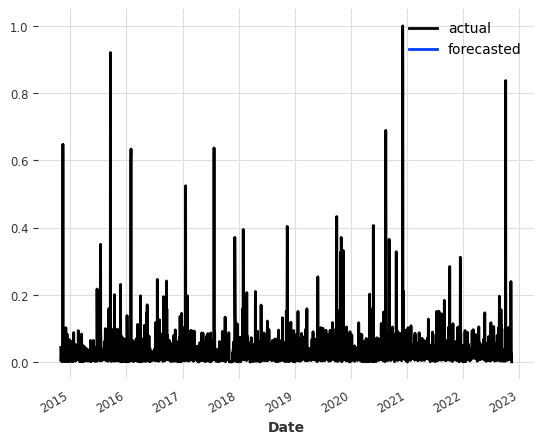

In [154]:
# plotting results
series_scaled .plot(label = "actual")
pred_outages.plot(label = "forecasted") # validation data set
plt.legend()
# plotting results

In [3]:
pip install --upgrade transformers

Note: you may need to restart the kernel to use updated packages.


In [155]:
# Convert run_start_time to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the run_start_time column as the DataFrame index
df.set_index('Date', inplace=True)

KeyError: 'Date'

In [156]:
df=df.reset_index()

In [157]:
df

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
2927,2022-11-08,4974.0
2928,2022-11-09,1038.0
2929,2022-11-10,682.0
2930,2022-11-11,1778.0


In [173]:
df.drop(['level_0','index'], axis=1)

,date,Highest_Outage
0,2014-11-01,377.0
1,2014-11-01,0.0
2,2014-11-01,0.0
3,2014-11-01,0.0
4,2014-11-01,0.0
...,...,...
70176,2022-11-12,0.0
70177,2022-11-12,22.0
70178,2022-11-12,25.0
70179,2022-11-12,25.0


In [202]:
df_grouped=df.resample('D')['Highest_Outage'].max()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [158]:
# Convert run_start_time to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the run_start_time column as the DataFrame index
df.set_index('date', inplace=True)

KeyError: 'date'

In [159]:
df

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
2927,2022-11-08,4974.0
2928,2022-11-09,1038.0
2929,2022-11-10,682.0
2930,2022-11-11,1778.0


In [160]:
# Convert run_start_time to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the run_start_time column as the DataFrame index
df.set_index('Date', inplace=True)

In [161]:
df.drop(['level_0','index'], axis=1)

KeyError: "['level_0', 'index'] not found in axis"

In [200]:
df_grouped

,Highest_Outage
date,
2014-11-01,20381.0
2014-11-02,1958.0
2014-11-03,1577.0
2014-11-04,2641.0
2014-11-05,2824.0
...,...
2022-11-08,20202.0
2022-11-09,7563.0
2022-11-10,2976.0


In [162]:
df

,Highest_Outage
Date,
2014-11-01,3191.0
2014-11-02,251.0
2014-11-03,205.0
2014-11-04,659.0
2014-11-05,1769.0
...,...
2022-11-08,4974.0
2022-11-09,1038.0
2022-11-10,682.0


In [133]:
dfn=df_grouped

In [165]:
df

,Highest_Outage
Date,
2014-11-01,3191.0
2014-11-02,251.0
2014-11-03,205.0
2014-11-04,659.0
2014-11-05,1769.0
...,...
2022-11-08,4974.0
2022-11-09,1038.0
2022-11-10,682.0


In [166]:
series=df.squeeze()

<Axes: xlabel='Date'>

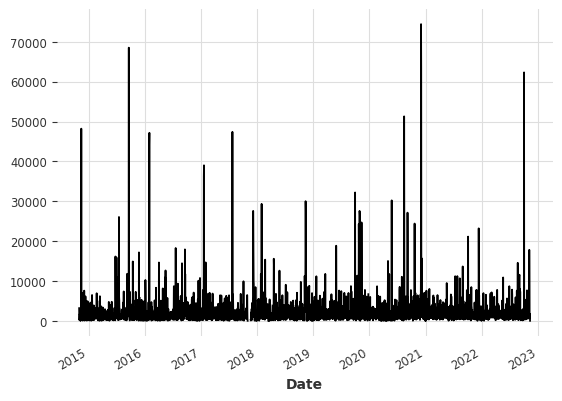

In [167]:
series.plot(label="Number Of hourly ")

In [168]:
from darts.models import AutoARIMA

In [169]:
from darts.models import FFT

In [170]:
# facebook prophet model
from darts.models import Prophet

In [171]:
from darts.backtesting import backtest_forecasting

ModuleNotFoundError: No module named 'darts.backtesting'

In [172]:
from darts.metrics import mape

In [173]:
from darts import TimeSeries
from darts.models import Prophet, ExponentialSmoothing, AutoARIMA, Theta, RegressionEnsembleModel, RegressionModel

In [174]:
from darts.metrics import rmse 

def eval_model(model, flow,
               past_covariates=None,  future_covariates=None,
              retrain = False,
              forecast_horizon = 10,
              last_obs = 200):
    # Past and future covariates are optional because they won't always be used in our tests
    
    # We backtest the model on the last 20% of the flow series, 
    # with a horizon of `forecast_horizon` steps:
    backtest = model.historical_forecasts(series=flow, 
                                          past_covariates=past_covariates,
                                          future_covariates=future_covariates,
                                          start=0.8, 
                                          retrain=retrain,
                                          verbose=True, 
                                          forecast_horizon=forecast_horizon)
    
    flow[-len(backtest) - last_obs:].plot()
    backtest.plot(label='backtest (n=' + str(forecast_horizon) + ')')
    
    print('Backtest RMSE = {}'.format(np.round( rmse(flow, backtest) )))

In [175]:
print(series)

Date
2014-11-01    3191.0
2014-11-02     251.0
2014-11-03     205.0
2014-11-04     659.0
2014-11-05    1769.0
               ...  
2022-11-08    4974.0
2022-11-09    1038.0
2022-11-10     682.0
2022-11-11    1778.0
2022-11-12      25.0
Name: Highest_Outage, Length: 2932, dtype: float64


In [176]:
df = df.loc[df.Date > CFG.cutoff]
series = TimeSeries.from_dataframe(df, 'Date', 'hourly_sum', freq = 'D')
series.plot()
# df.set_index('Date').VWAP.plot()

AttributeError: 'DataFrame' object has no attribute 'Date'

In [177]:
df

,Highest_Outage
Date,
2014-11-01,3191.0
2014-11-02,251.0
2014-11-03,205.0
2014-11-04,659.0
2014-11-05,1769.0
...,...
2022-11-08,4974.0
2022-11-09,1038.0
2022-11-10,682.0


In [188]:
df=df.drop(['level_0','index'], axis=1)

In [189]:
df

,Highest_Outage
date,
2014-11-01,377.0
2014-11-01,0.0
2014-11-01,0.0
2014-11-01,0.0
2014-11-01,0.0
...,...
2022-11-12,0.0
2022-11-12,22.0
2022-11-12,25.0


In [178]:
df=df.reset_index()

In [179]:
# Assuming CFG.cutoff is the desired cutoff date
df = df.loc[df['Date'] > CFG.cutoff]

# Create the TimeSeries object from the DataFrame
series = TimeSeries.from_dataframe(df, 'Date', 'Highest_Outage', freq='D')

# Plot the TimeSeries data
series.plot()

NameError: name 'CFG' is not defined

In [180]:
# ExponentialSmoothing can't handle NAs :-(
from darts.utils.missing_values import fill_missing_values
series = fill_missing_values(series)

# split into training / validation
train, val = series[:-60], series[-60:]

AttributeError: 'Series' object has no attribute 'pd_dataframe'

In [224]:
dfn=df
dfn

,Date,Highest_Outage,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2014-11-01,3191.0,2014-11-01,0,5,4,11,2014,305,1,44
1,2014-11-02,251.0,2014-11-02,0,6,4,11,2014,306,2,44
2,2014-11-03,205.0,2014-11-03,0,0,4,11,2014,307,3,45
3,2014-11-04,659.0,2014-11-04,0,1,4,11,2014,308,4,45
4,2014-11-05,1769.0,2014-11-05,0,2,4,11,2014,309,5,45
...,...,...,...,...,...,...,...,...,...,...,...
2927,2022-11-08,4974.0,2022-11-08,0,1,4,11,2022,312,8,45
2928,2022-11-09,1038.0,2022-11-09,0,2,4,11,2022,313,9,45
2929,2022-11-10,682.0,2022-11-10,0,3,4,11,2022,314,10,45
2930,2022-11-11,1778.0,2022-11-11,0,4,4,11,2022,315,11,45


In [181]:
df

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
2927,2022-11-08,4974.0
2928,2022-11-09,1038.0
2929,2022-11-10,682.0
2930,2022-11-11,1778.0


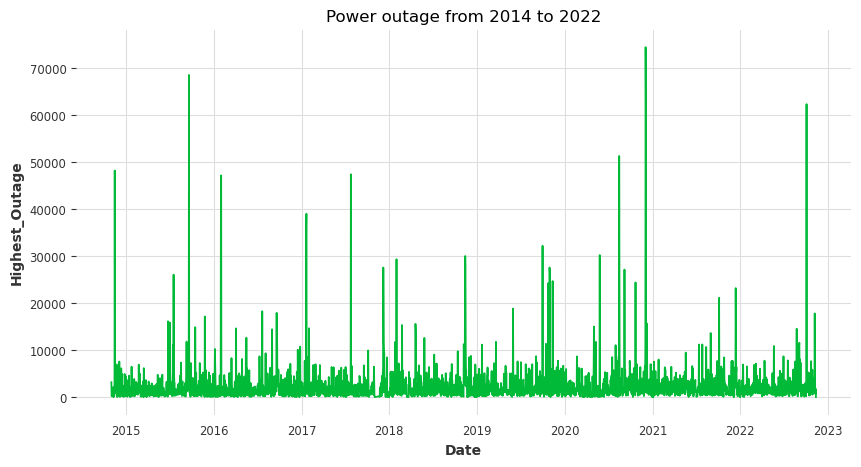

In [184]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x=df.Date, y = df["Highest_Outage"], color = "#00BA38")
ax.title.set_text('Power outage from 2014 to 2022')

In [185]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df['date'] = df.Datetime
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['date','hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
    
    if label:
        y = df[label]
        return X, y
    return X

In [186]:
# See our features and target
X, y = create_features(df, label='Highest_Outage')
features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()

AttributeError: 'DataFrame' object has no attribute 'Datetime'

In [187]:
df

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
2927,2022-11-08,4974.0
2928,2022-11-09,1038.0
2929,2022-11-10,682.0
2930,2022-11-11,1778.0


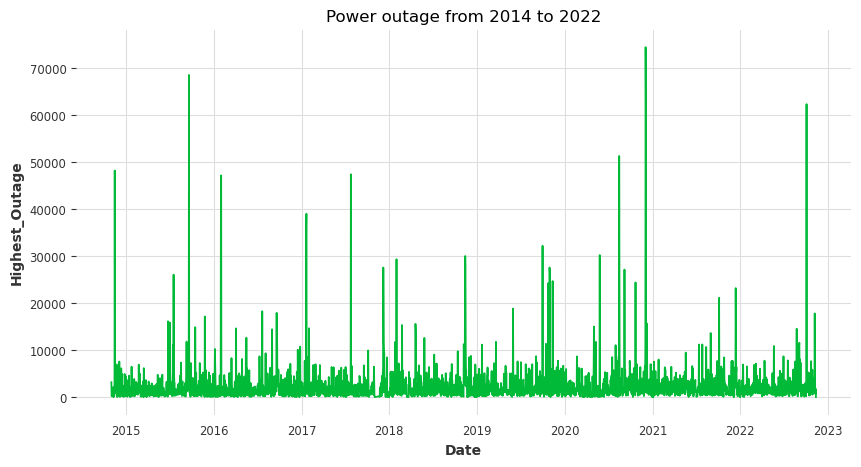

In [188]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x=df.Date, y = df["Highest_Outage"], color = "#00BA38")
ax.title.set_text('Power outage from 2014 to 2022')

In [195]:
def create_features(df1, label=None):
    """
    Creates time series features from datetime index.
    """
  
    df1['date'] = df1.Date
    df1['hour'] = df1['Date'].dt.hour
    df1['dayofweek'] = df1['Date'].dt.dayofweek
    df1['quarter'] = df1['Date'].dt.quarter
    df1['month'] = df1['Date'].dt.month
    df1['year'] = df1['Date'].dt.year
    df1['dayofyear'] = df1['Date'].dt.dayofyear
    df1['dayofmonth'] = df1['Date'].dt.day
    df1['weekofyear'] = df1['Date'].dt.weekofyear
    
    X = df1[['Date','hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
    
    if label:
        y = df1[label]
        return X, y
    return X

In [196]:
# See our features and target
X, y = create_features(df, label='Highest_Outage')
features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()

C:\Users\halee\AppData\Local\Temp\ipykernel_10752\4057959054.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['weekofyear'] = df1['Date'].dt.weekofyear


,Date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Highest_Outage
0,2014-11-01,0,5,4,11,2014,305,1,44,3191.0
1,2014-11-02,0,6,4,11,2014,306,2,44,251.0
2,2014-11-03,0,0,4,11,2014,307,3,45,205.0
3,2014-11-04,0,1,4,11,2014,308,4,45,659.0
4,2014-11-05,0,2,4,11,2014,309,5,45,1769.0


In [197]:
# Setup and train model and fit

import prophet
model = Prophet()
model.fit(df_train_prophet)

NameError: name 'df_train_prophet' is not defined

In [198]:
# we reduce the dataset size for speed - the only requirement while doing is to keep at least two complete cycles 
# for each seasonality we intend to fit 
m = Prophet().fit(xdat.iloc[:30000])
future = m.make_future_dataframe(periods = 24, freq = 'H')
forecast = m.predict(future)
m.plot_components(forecast, figsize=(CFG.img_dim1, CFG.img_dim2))
print()

NameError: name 'xdat' is not defined

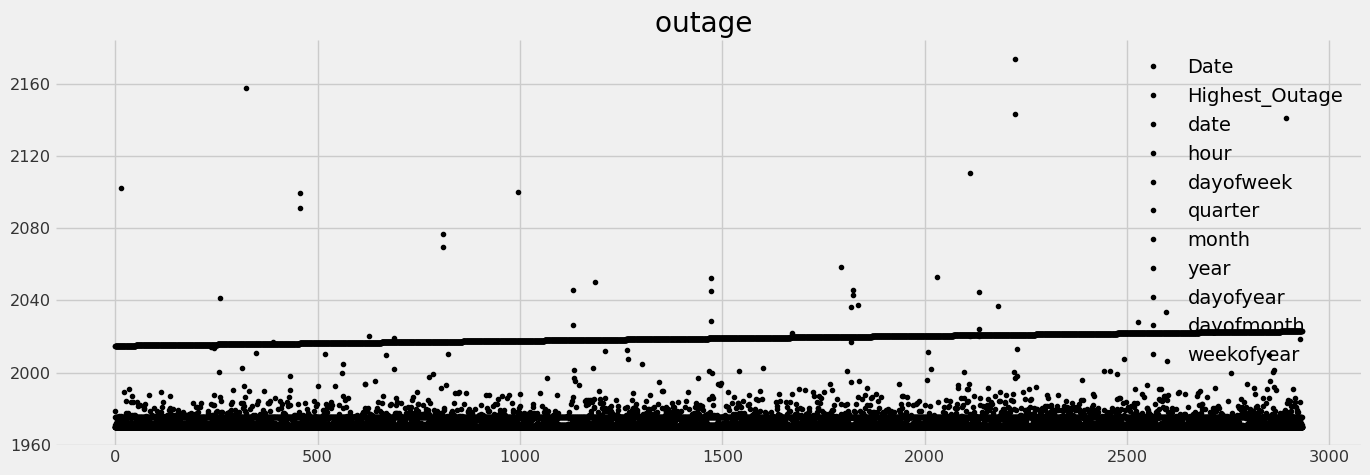

In [201]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='outage ')
plt.show()

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

<Axes: ylabel='Frequency'>

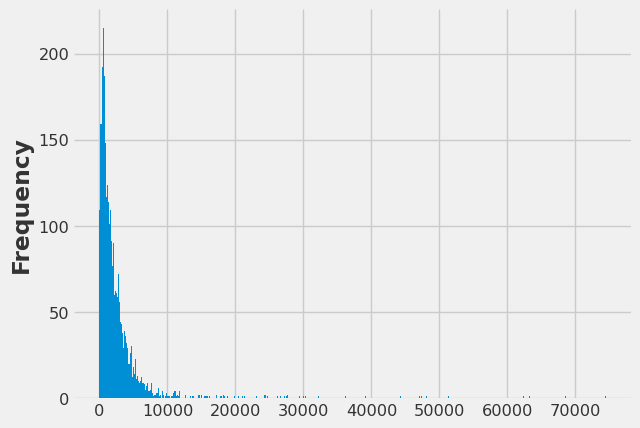

In [202]:
df['Highest_Outage'].plot(kind='hist', bins=500)

<Axes: title={'center': 'Outliers'}>

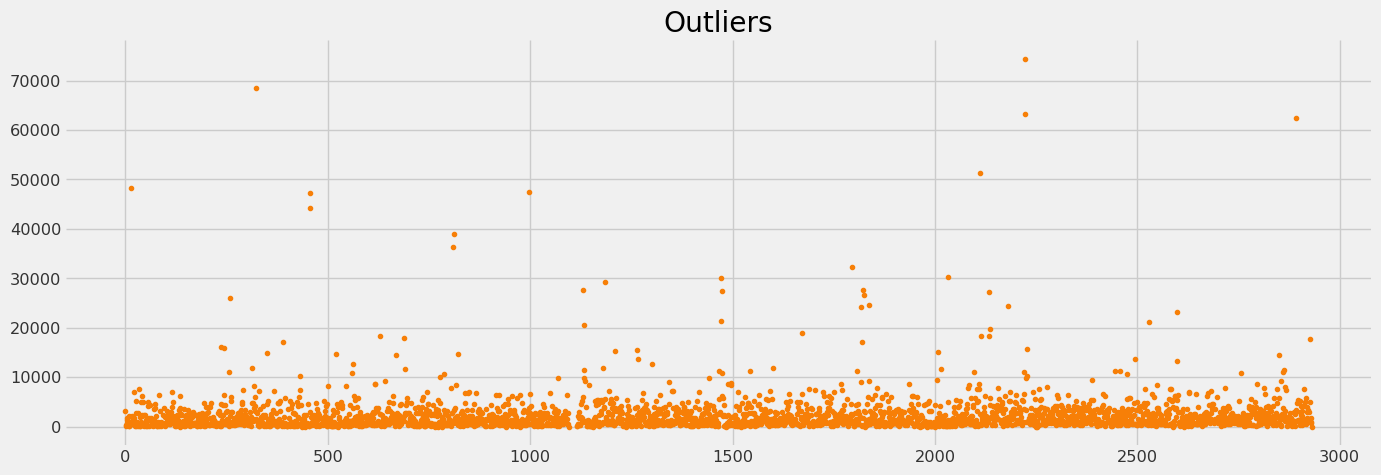

In [203]:
df.query('Highest_Outage > 0')['Highest_Outage'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [204]:
df = df.query('Highest_Outage > 0').copy()

In [205]:
train = df.loc[df.index < '01-01-2020']
test = df.loc[df.index >= '01-01-2020']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2020', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

In [206]:
train = df.loc[df.index < '01-01-2020']
test = df.loc[df.index >= '01-01-2020']
# Plot the train and test sets
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2020-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

In [207]:
import pandas as pd
from darts import TimeSeries

In [221]:

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df1, "date", "Highest_Outage")

ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.


ValueError: The time index of the provided DataArray is missing the freq attribute, and the frequency could not be directly inferred. This probably comes from inconsistent date frequencies with missing dates. If you know the actual frequency, try setting `fill_missing_dates=True, freq=actual_frequency`. If not, try setting `fill_missing_dates=True, freq=None` to see if a frequency can be inferred.

In [215]:
   df1['month'] = df1['Date'].dt.month

In [214]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [210]:
df1

,Highest_Outage
Date,
2014-11-01,3191.0
2014-11-02,251.0
2014-11-03,205.0
2014-11-04,659.0
2014-11-05,1769.0
...,...
2022-11-08,4974.0
2022-11-09,1038.0
2022-11-10,682.0


In [212]:
df1=df1.reset_index()

In [213]:
df1

,Date,Highest_Outage
0,2014-11-01,3191.0
1,2014-11-02,251.0
2,2014-11-03,205.0
3,2014-11-04,659.0
4,2014-11-05,1769.0
...,...,...
2927,2022-11-08,4974.0
2928,2022-11-09,1038.0
2929,2022-11-10,682.0
2930,2022-11-11,1778.0


In [216]:
# Filter rows for the year 2021
df_2021 = df1[df1["Date"].dt.year == 2021]

In [217]:
df_2021

,Date,Highest_Outage,month
2251,2021-01-01,1122.0,1
2252,2021-01-02,384.0,1
2253,2021-01-03,10.0,1
2254,2021-01-04,2625.0,1
2255,2021-01-05,2976.0,1
...,...,...,...
2611,2021-12-27,3039.0,12
2612,2021-12-28,3687.0,12
2613,2021-12-29,1771.0,12
2614,2021-12-30,655.0,12


In [218]:

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df_2021, "Date", "Highest_Outage")

In [219]:
# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [220]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=100)

C:\Users\halee\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [225]:
# Convert the "run_start_time" column to a datetime type
dfn['Date'] = pd.to_datetime(dfn['Date'])# Create a new column 'date' containing only the date part of 'run_start_time'
dfn['date'] = df['Date'].dt.date

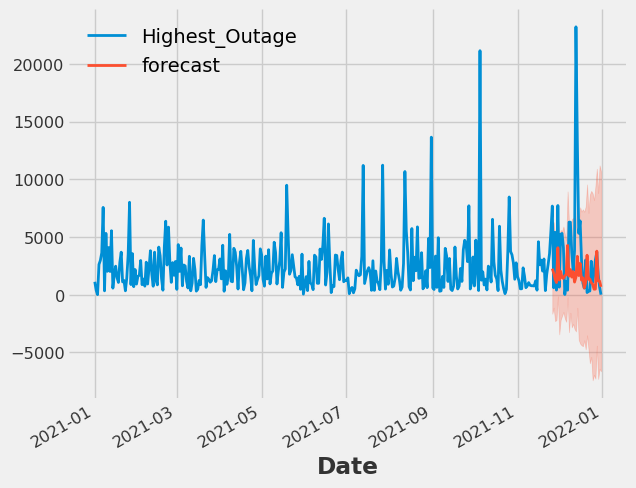

In [226]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [227]:
dfn

,Date,Highest_Outage,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2014-11-01,3191.0,2014-11-01,0,5,4,11,2014,305,1,44
1,2014-11-02,251.0,2014-11-02,0,6,4,11,2014,306,2,44
2,2014-11-03,205.0,2014-11-03,0,0,4,11,2014,307,3,45
3,2014-11-04,659.0,2014-11-04,0,1,4,11,2014,308,4,45
4,2014-11-05,1769.0,2014-11-05,0,2,4,11,2014,309,5,45
...,...,...,...,...,...,...,...,...,...,...,...
2927,2022-11-08,4974.0,2022-11-08,0,1,4,11,2022,312,8,45
2928,2022-11-09,1038.0,2022-11-09,0,2,4,11,2022,313,9,45
2929,2022-11-10,682.0,2022-11-10,0,3,4,11,2022,314,10,45
2930,2022-11-11,1778.0,2022-11-11,0,4,4,11,2022,315,11,45


In [228]:
from darts.datasets import ETTh2Dataset

series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = series.split_before(0.6)

In [229]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [230]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

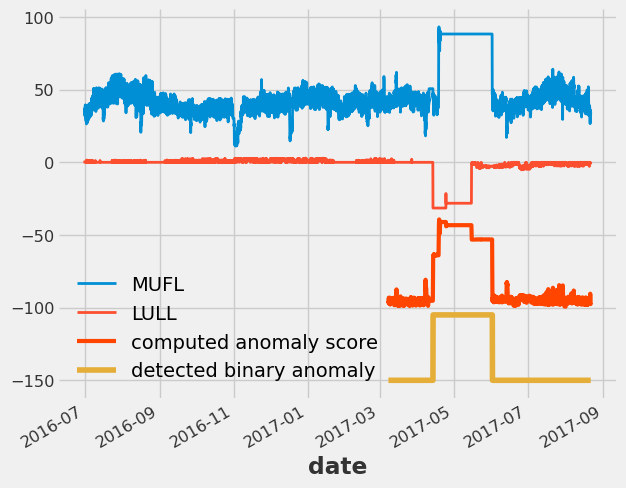

In [231]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [232]:
Series2 = TimeSeries.from_dataframe(df1, 'Date', 'Highest_Outage',fill_missing_dates=True)

In [233]:
train, val = Series2.split_before(pd.Timestamp('20210101'))

In [234]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

C:\Users\halee\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


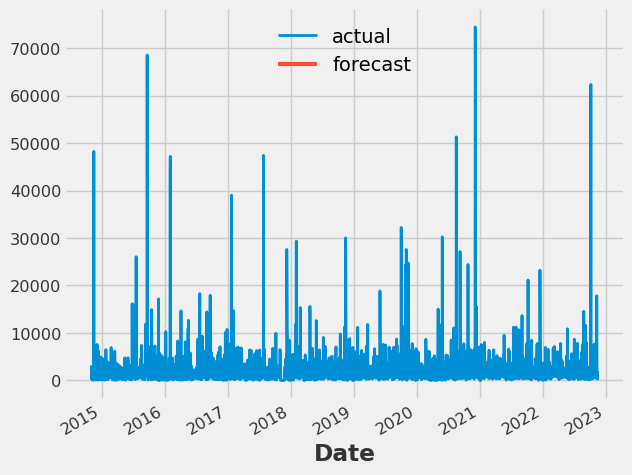

In [235]:
import matplotlib.pyplot as plt

Series2.plot(label = 'actual')
prediction.plot(label = 'forecast', lw = 3)
plt.legend()

In [236]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

ValueError: Input y contains NaN.

In [237]:
from darts.models import FFT

model_fft = FFT()
model_fft.fit(train)
prediction_fft = model_fft.predict(len(val))

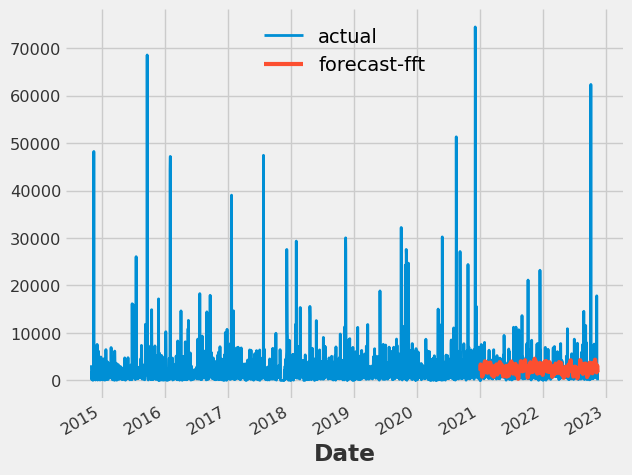

In [238]:
Series2.plot(label = 'actual')
prediction_fft.plot(label = 'forecast-fft', lw = 3)
plt.legend()

In [239]:
# facebook prophet model
from darts.models import Prophet

model_prophet = Prophet()
model_prophet.fit(train)
prediction_prophet = model_prophet.predict(len(val))

20:56:00 - cmdstanpy - INFO - Chain [1] start processing
20:56:01 - cmdstanpy - INFO - Chain [1] done processing


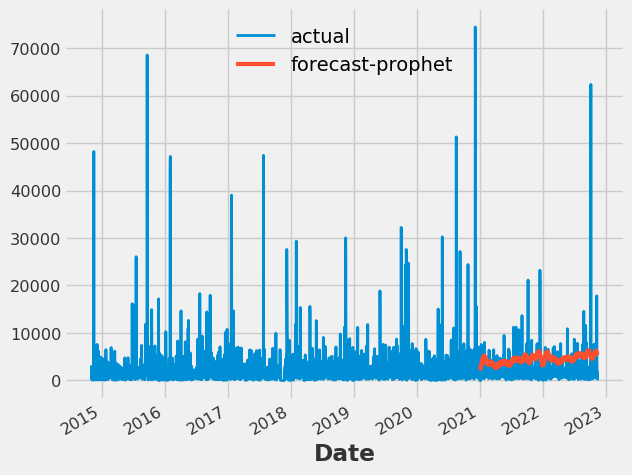

In [240]:
Series2.plot(label = 'actual')
prediction_prophet.plot(label = 'forecast-prophet', lw = 3)
plt.legend()

In [241]:
from darts.backtesting import backtest_forecasting

models = [ExponentialSmoothing(), Prophet()]

ModuleNotFoundError: No module named 'darts.backtesting'

NameError: name 'models' is not defined

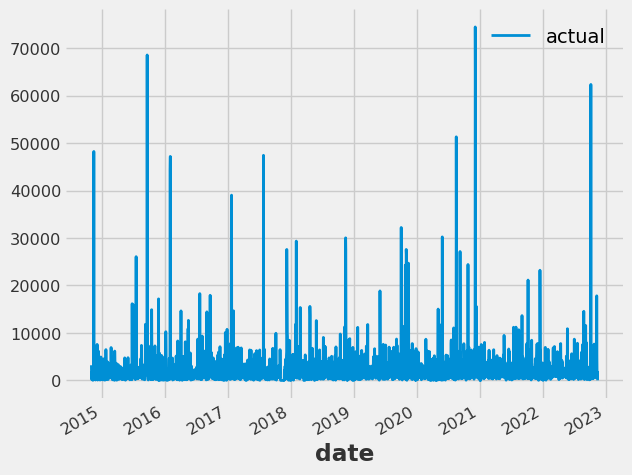

In [243]:
from darts.metrics import mape

Series2.plot(label='actual')
for i, m in enumerate(models):
    err = mape(backtests[i], Series2)
    backtests[i].plot(lw = 3, label = '{}, MAPE = {:.2f}%'.format(m, err))
    
plt.title('Backtest with 3-months forecast horizon')
plt.legend()

In [242]:
test_df = df1[df1['Highest_Outage'].isna()]
train_df = df1[~df1['Highest_Outage'].isna()]

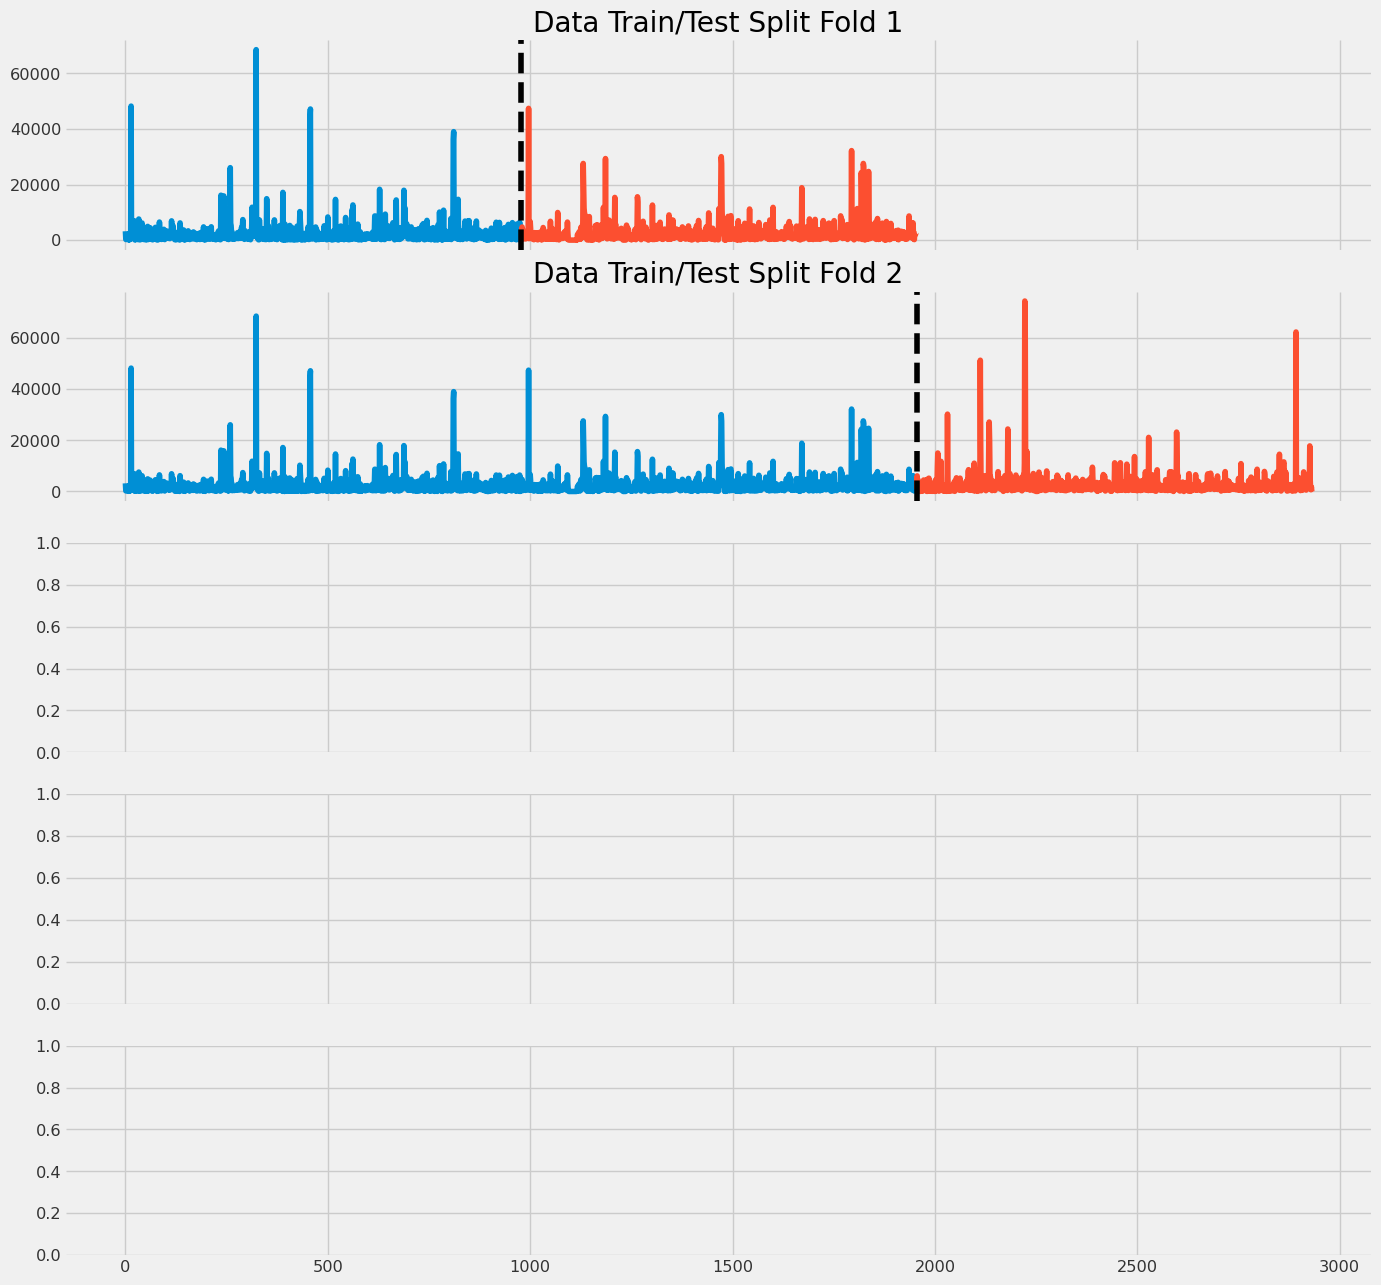

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cat
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import  TimeSeriesSplit
from darts import TimeSeries
from darts.models import RegressionModel
tss = TimeSeriesSplit(n_splits=2)

fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(train_df):
    train_df.iloc[train_idx]['Highest_Outage'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold + 1}')
    train_df.iloc[val_idx]['Highest_Outage'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(train_df.iloc[val_idx].index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [244]:
catboost_models = []
fold = 0
scores = []

for train_idx, val_idx in tss.split(train_df):
    train_data = train_df.iloc[train_idx]
    test_data = train_df.iloc[val_idx]

    X_train, y_train = train_data.drop('Highest_Outage', axis=1), train_data['Highest_Outage']
    X_val, y_val = test_data.drop('Highest_Outage', axis=1), test_data['Highest_Outage']

    feature_cov_train = TimeSeries.Series2(X_train)
    y_train_ts = TimeSeries.Series2(y_train)
    feature_cov_test = TimeSeries.Series2(X_val)

    model_catboost = RegressionModel(lags=[-24, -128, -256, -512, -1024, -2048, -4096],
                                     lags_future_covariates=[0],
                                     model=cat.CatBoostRegressor(n_estimators=1000,
                                                                 verbose=200,
                                                                 eval_metric='MAPE'))

    print(f'{fold + 1}. Fold Training... ')
    fold += 1
    model_catboost.fit(y_train_ts, future_covariates=feature_cov_train)
    catboost_models.append(model_catboost)
    pred = model_catboost.predict(n=X_val.shape[0], Series2=y_train_ts, future_covariates=feature_cov_test)
    score = mean_absolute_percentage_error(y_val, pred.values())
    scores.append(score)
    del train_data, test_data, model_catboost, X_train, y_train, X_val, y_val

    print(f'Test score => {score}')

print(f'CV score => {np.average(scores)}')

AttributeError: type object 'TimeSeries' has no attribute 'Series2'

In [245]:
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have a DataFrame named 'train_df' with columns 'fips_code', 'date', and 'Highest_Outage'

tss = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits

catboost_models = []
fold = 0
scores = []

for train_idx, val_idx in tss.split(train_df):
    train_data = train_df.iloc[train_idx]
    test_data = train_df.iloc[val_idx]

    X_train, y_train = train_data.drop('Highest_Outage', axis=1), train_data['Highest_Outage']
    X_val, y_val = test_data.drop('Highest_Outage', axis=1), test_data['Highest_Outage']

    model_catboost = CatBoostRegressor(n_estimators=1000, verbose=200, eval_metric='MAPE')
    
    print(f'{fold + 1}. Fold Training... ')
    fold += 1
    model_catboost.fit(X_train, y_train)
    catboost_models.append(model_catboost)
    
    pred = model_catboost.predict(X_val)
    score = mean_absolute_percentage_error(y_val, pred)
    scores.append(score)
    
    print(f'Test score => {score}')

print(f'CV score => {np.average(scores)}')


1. Fold Training... 
Learning rate set to 0.036602
0:	learn: 8.6315682	total: 164ms	remaining: 2m 44s
200:	learn: 8.2249432	total: 371ms	remaining: 1.47s
400:	learn: 7.8692983	total: 575ms	remaining: 859ms
600:	learn: 7.1535181	total: 781ms	remaining: 519ms
800:	learn: 6.9491898	total: 988ms	remaining: 245ms
999:	learn: 6.8387071	total: 1.2s	remaining: 0us
Test score => 9.371201159518651e+16
2. Fold Training... 
Learning rate set to 0.040813
0:	learn: 14.9689076	total: 1.16ms	remaining: 1.16s
200:	learn: 11.4630586	total: 213ms	remaining: 845ms
400:	learn: 10.5060202	total: 425ms	remaining: 635ms
600:	learn: 9.4300144	total: 645ms	remaining: 428ms
800:	learn: 8.4194836	total: 867ms	remaining: 215ms
999:	learn: 7.9758549	total: 1.1s	remaining: 0us
Test score => 3.0050070673975136e+17
3. Fold Training... 
Learning rate set to 0.043503
0:	learn: 52.0564776	total: 1.47ms	remaining: 1.47s
200:	learn: 32.5123100	total: 249ms	remaining: 989ms
400:	learn: 26.8199241	total: 495ms	remaining: 739

In [246]:
final_model = CatBoostRegressor(n_estimators=1000, verbose=200, eval_metric='MAPE')
final_model.fit(train_df.drop('Highest_Outage', axis=1), train_df['Highest_Outage'])


Learning rate set to 0.048528
0:	learn: 31.4794153	total: 1.7ms	remaining: 1.7s
200:	learn: 23.3829054	total: 303ms	remaining: 1.2s
400:	learn: 20.2275401	total: 608ms	remaining: 908ms
600:	learn: 17.8715027	total: 920ms	remaining: 611ms
800:	learn: 16.5623955	total: 1.23s	remaining: 307ms
999:	learn: 14.9133540	total: 1.54s	remaining: 0us


In [247]:
# Assuming 'test_df' is your DataFrame containing the test data with the same features as 'train_df'
test_predictions = final_model.predict(test_df.drop('Highest_Outage', axis=1))


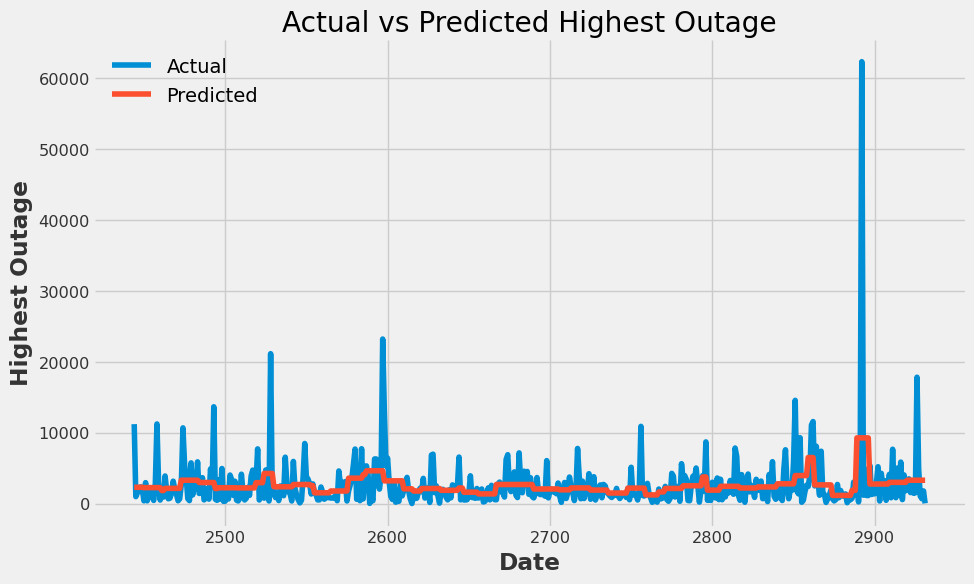

Test MAPE: 3.22%
Test Accuracy: 96.78%


In [248]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Assuming 'test_df' is your DataFrame containing the test data with the same features as 'train_df'
test_features = test_data.drop('Highest_Outage', axis=1)
test_actual_values = test_data['Highest_Outage']

# Make predictions using the final model
test_predictions = final_model.predict(test_features)

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_actual_values, test_predictions)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test_actual_values.index, test_actual_values.values, label='Actual')
plt.plot(test_actual_values.index, test_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Highest Outage')
plt.title('Actual vs Predicted Highest Outage')
plt.legend()
plt.show()

# Display test loss (MAPE) and accuracy
print(f'Test MAPE: {test_mape:.2f}%')
print(f'Test Accuracy: {100 - test_mape:.2f}%')


In [253]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import lightgbm as lgb

# Assuming you have a DataFrame named 'data' with features and 'target' column for outage
# 'data' should have features like weather conditions, location, time, etc.

# Split the data into features (X) and target (y)
X = df.drop('Highest_Outage', axis=1)
y = df['Highest_Outage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Define the parameters for the LightGBM model
params = {
    'objective': 'regression',  # For regression tasks
    'metric': 'mape',           # Metric to optimize (Mean Absolute Percentage Error)
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'num_leaves': 31,           # Maximum number of leaves in a tree
    'learning_rate': 0.05,      # Learning rate
    'feature_fraction': 0.9,    # Fraction of features used for each iteration
    'bagging_fraction': 0.8,    # Fraction of data used for bagging
    'bagging_freq': 5,          # Frequency of bagging
    'verbose': 0                # Verbosity of training
}

# Train the LightGBM model
num_round = 1000  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=50)

# Make predictions on the test data
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape:.2f}%')

# You can also visualize feature importances
lgb.plot_importance(bst, max_num_features=10)


TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [254]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define the parameters for the LightGBM model
params = {
    'objective': 'regression',  # For regression tasks
    'metric': 'mape',           # Metric to optimize (Mean Absolute Percentage Error)
    'boosting_type': 'gbdt',    # Gradient Boosting Decision Tree
    'num_leaves': 31,           # Maximum number of leaves in a tree
    'learning_rate': 0.05,      # Learning rate
    'feature_fraction': 0.9,    # Fraction of features used for each iteration
    'bagging_fraction': 0.8,    # Fraction of data used for bagging
    'bagging_freq': 5,          # Frequency of bagging
    'verbose': 0                # Verbosity of training
}

# Perform cross-validation with early stopping
cv_results = lgb.cv(params, train_data, num_boost_round=1000, nfold=5, early_stopping_rounds=50, metrics='mape')

# Determine the optimal number of boosting rounds
optimal_num_round = len(cv_results['mape-mean'])

# Train the final LightGBM model using the optimal number of boosting rounds
final_bst = lgb.train(params, train_data, num_boost_round=optimal_num_round)

# Make predictions on the test data
y_pred = final_bst.predict(X_test)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape:.2f}%')

# You can also visualize feature importances
lgb.plot_importance(final_bst, max_num_features=10)


TypeError: cv() got an unexpected keyword argument 'early_stopping_rounds'

In [255]:
import pandas as pd
from darts import TimeSeries

# Assuming X_train and y_train are pandas Series containing the input features and target variable
# Convert the "Timestamp" objects to Unix timestamps or any numerical representation you prefer
X_train_numeric = X_train.apply(lambda x: pd.Timestamp(x).timestamp())

# Create the TimeSeries for the input features and target variable
feature_cov_train = TimeSeries.from_series(X_train_numeric)
y_train_ts = TimeSeries.from_series(y_train)

# Assuming X_val and y_val are pandas Series for the validation set
# Convert the "Timestamp" objects to Unix timestamps or any numerical representation you prefer
X_val_numeric = X_val.apply(lambda x: pd.Timestamp(x).timestamp())

# Create the TimeSeries for the input features of the validation set
feature_cov_test = TimeSeries.from_series(X_val_numeric)

TypeError: Cannot convert input [11957   2016-03-16
58041   2021-06-24
30890   2018-05-16
53727   2020-12-25
68216   2022-08-22
           ...    
69155   2022-10-01
42890   2019-09-29
962     2014-12-11
17558   2016-11-04
62604   2022-01-01
Name: date, Length: 50808, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [258]:
# Convert run_start_time to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Set the run_start_time column as the DataFrame index
df1.set_index('Date', inplace=True)

In [250]:
df1

,Date,Highest_Outage,month
0,2014-11-01,3191.0,11
1,2014-11-02,251.0,11
2,2014-11-03,205.0,11
3,2014-11-04,659.0,11
4,2014-11-05,1769.0,11
...,...,...,...
2927,2022-11-08,4974.0,11
2928,2022-11-09,1038.0,11
2929,2022-11-10,682.0,11
2930,2022-11-11,1778.0,11


In [259]:
#Creating timeseries object for demand
from darts import TimeSeries
series_demand = TimeSeries.from_dataframe(df1, value_cols='Highest_Outage',fill_missing_dates=True)
series_demand

<TimeSeries (DataArray) (Date: 2934, component: 1, sample: 1)>
array([[[3191.]],

       [[ 251.]],

       [[ 205.]],

       ...,

       [[ 682.]],

       [[1778.]],

       [[  25.]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2014-11-01 2014-11-02 ... 2022-11-12
  * component  (component) object 'Highest_Outage'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

seasonal? False


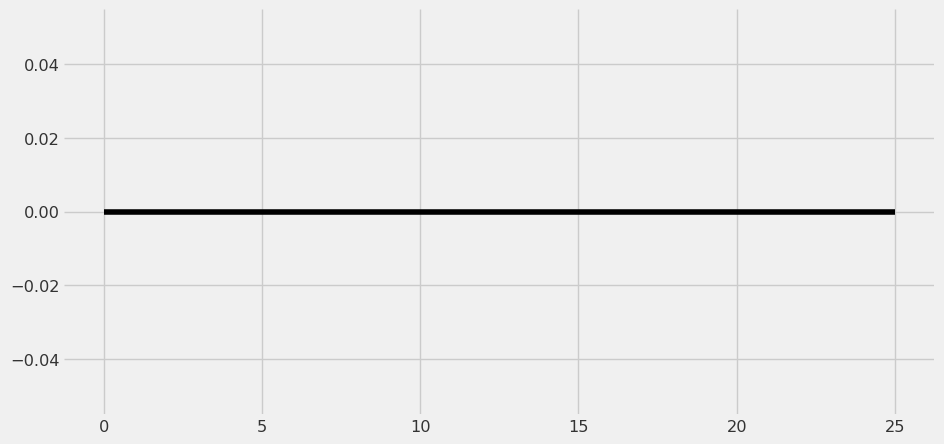

In [260]:
# Check for seasonality
from darts.utils.statistics import plot_acf, check_seasonality

for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(series_demand, m=m, alpha=0.05)
    if is_seasonal:
        break

print("seasonal? " + str(is_seasonal))
if is_seasonal:
    print('There is seasonality of order {}.'.format(mseas))

plot_acf(series_demand, m=12, alpha=0.05)

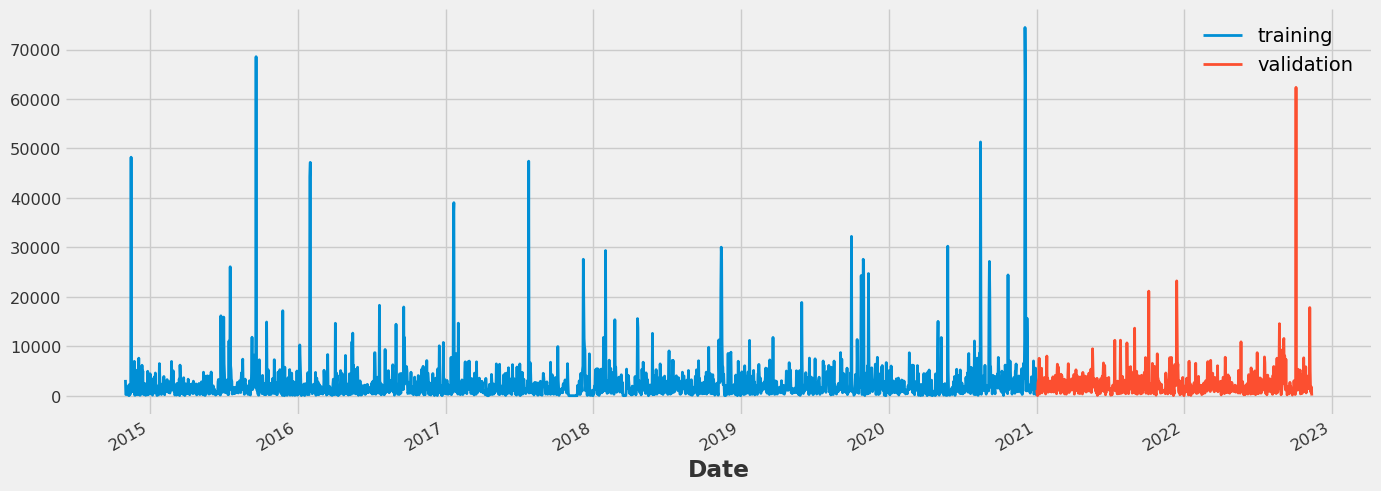

In [261]:
train, val = series_demand.split_before(pd.Timestamp("20210101"))
plt.figure(figsize=(15,5))
train.plot(label="training")
val.plot(label="validation")

In [262]:
from darts.models import ExponentialSmoothing, FFT, Prophet, AutoARIMA, Theta
from darts.metrics import mape, r2_score

def eval_model(model):
    start_time = datetime.now() 
    model.fit(train)
    time_elapsed = datetime.now() - start_time
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}% , Training time: {}".format(model, mape(val, forecast), time_elapsed))

eval_model(ExponentialSmoothing())
eval_model(FFT())
eval_model(Prophet())
eval_model(AutoARIMA())
eval_model(Theta())

C:\Users\halee\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\halee\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\halee\anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


model ExponentialSmoothing() obtains MAPE: nan% , Training time: 0:00:00.360095
model FFT() obtains MAPE: 310.35% , Training time: 0:00:00.007001


21:00:16 - cmdstanpy - INFO - Chain [1] start processing
21:00:16 - cmdstanpy - INFO - Chain [1] done processing


model Prophet() obtains MAPE: 568.81% , Training time: 0:00:00.389019


ValueError: Input y contains NaN.

In [263]:
import pandas as pd
from darts import TimeSeries
from datetime import datetime  # Add this line to import the datetime class

# Your code and functions...

# In your eval_model function, explicitly use the datetime class to call the now() method
def eval_model(model):
    start_time = datetime.now()  # Use datetime.now() instead of just now()
    model.fit(train)
    time_elapsed = datetime.now() - start_time
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}% , Training time: {}".format(model, mape(val, forecast), time_elapsed))

eval_model(ExponentialSmoothing())
eval_model(FFT())
eval_model(Prophet())

C:\Users\halee\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\halee\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\halee\anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


model ExponentialSmoothing() obtains MAPE: nan% , Training time: 0:00:00.360995
model FFT() obtains MAPE: 310.35% , Training time: 0:00:00.007040


21:00:21 - cmdstanpy - INFO - Chain [1] start processing
21:00:21 - cmdstanpy - INFO - Chain [1] done processing


model Prophet() obtains MAPE: 568.81% , Training time: 0:00:00.384339


In [264]:
model_demand = Prophet()
model_demand.fit(train)

21:00:23 - cmdstanpy - INFO - Chain [1] start processing
21:00:24 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

Text(0.5, 1.0, 'MAPE: 568.8140970870533')

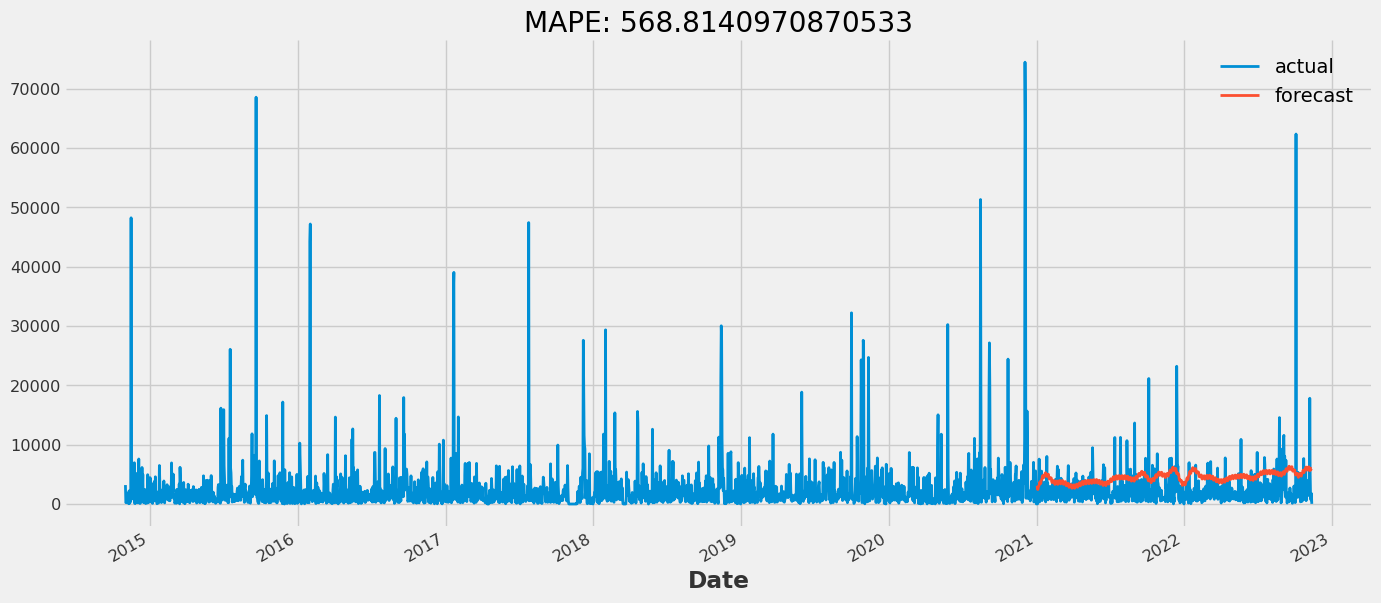

In [265]:
# use the model to make a forecast
pred_demand = model_demand.predict(len(val))

plt.figure(figsize=(15, 6))
series_demand.plot(label="actual")
pred_demand.plot(label="forecast")
plt.title("MAPE: {}".format(mape(val, pred_demand)))

In [266]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(15, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

pred_series = model_demand.historical_forecasts(
    series_demand,
    start=pd.Timestamp("2020-09-01"),
    forecast_horizon=30,
    stride=5,
    verbose=True,
)
display_forecast(pred_series, series_demand, "30 day", start_date=pd.Timestamp("2020-09-01"))

  0%|          | 0/155 [00:00<?, ?it/s]

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\halee\\AppData\\Local\\Temp\\tmp923syckk\\9bkm10vs.json'

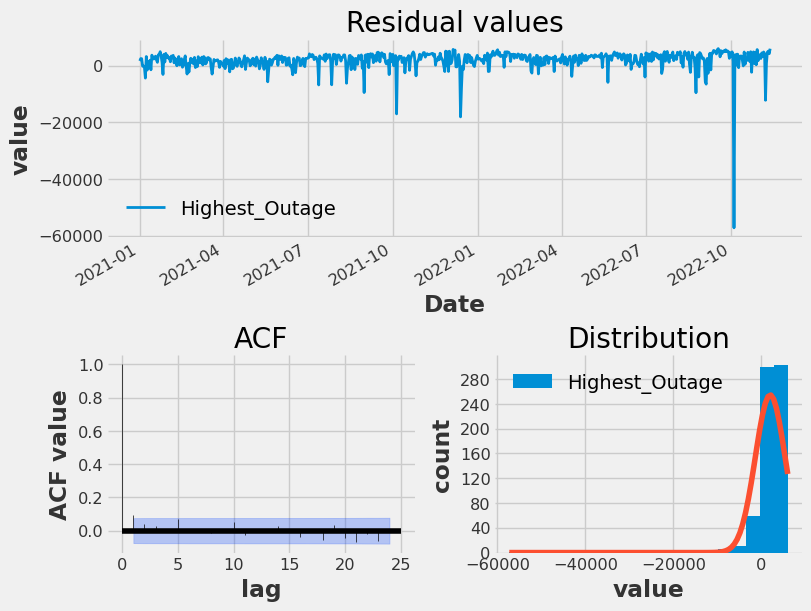

In [267]:
# investigate the residuals in the validation dataset
from darts.utils.statistics import plot_residuals_analysis
resid = pred_demand - val
plot_residuals_analysis(resid);

In [268]:
# Convert the "run_start_time" column to a datetime type
dfn['Date'] = pd.to_datetime(dfn['Date'])

In [269]:
dfn

,Date,Highest_Outage,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2014-11-01,3191.0,2014-11-01,0,5,4,11,2014,305,1,44
1,2014-11-02,251.0,2014-11-02,0,6,4,11,2014,306,2,44
2,2014-11-03,205.0,2014-11-03,0,0,4,11,2014,307,3,45
3,2014-11-04,659.0,2014-11-04,0,1,4,11,2014,308,4,45
4,2014-11-05,1769.0,2014-11-05,0,2,4,11,2014,309,5,45
...,...,...,...,...,...,...,...,...,...,...,...
2927,2022-11-08,4974.0,2022-11-08,0,1,4,11,2022,312,8,45
2928,2022-11-09,1038.0,2022-11-09,0,2,4,11,2022,313,9,45
2929,2022-11-10,682.0,2022-11-10,0,3,4,11,2022,314,10,45
2930,2022-11-11,1778.0,2022-11-11,0,4,4,11,2022,315,11,45


In [270]:

# Create a new column 'date' containing only the date part of 'run_start_time'
dfn['date'] = dfn['Date'].dt.date

In [271]:
dfn

,Date,Highest_Outage,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2014-11-01,3191.0,2014-11-01,0,5,4,11,2014,305,1,44
1,2014-11-02,251.0,2014-11-02,0,6,4,11,2014,306,2,44
2,2014-11-03,205.0,2014-11-03,0,0,4,11,2014,307,3,45
3,2014-11-04,659.0,2014-11-04,0,1,4,11,2014,308,4,45
4,2014-11-05,1769.0,2014-11-05,0,2,4,11,2014,309,5,45
...,...,...,...,...,...,...,...,...,...,...,...
2927,2022-11-08,4974.0,2022-11-08,0,1,4,11,2022,312,8,45
2928,2022-11-09,1038.0,2022-11-09,0,2,4,11,2022,313,9,45
2929,2022-11-10,682.0,2022-11-10,0,3,4,11,2022,314,10,45
2930,2022-11-11,1778.0,2022-11-11,0,4,4,11,2022,315,11,45


In [146]:
dfn['date']=dfn.index.date

AttributeError: 'RangeIndex' object has no attribute 'date'

In [147]:
df_grouped

Date
2014-11-01 06:00:00    377.0
2014-11-01 07:00:00      0.0
2014-11-01 08:00:00      0.0
2014-11-01 09:00:00      0.0
2014-11-01 10:00:00      0.0
                       ...  
2022-11-12 14:00:00      0.0
2022-11-12 15:00:00     22.0
2022-11-12 16:00:00     25.0
2022-11-12 17:00:00     25.0
2022-11-12 18:00:00     25.0
Freq: H, Name: Highest_Outage, Length: 70405, dtype: float64

In [148]:
dfr=df_grouped

In [150]:
series=dfr.squeeze()

In [151]:
dfr=dfr.reset_index()

In [152]:
print(series)

Date
2014-11-01 06:00:00    377.0
2014-11-01 07:00:00      0.0
2014-11-01 08:00:00      0.0
2014-11-01 09:00:00      0.0
2014-11-01 10:00:00      0.0
                       ...  
2022-11-12 14:00:00      0.0
2022-11-12 15:00:00     22.0
2022-11-12 16:00:00     25.0
2022-11-12 17:00:00     25.0
2022-11-12 18:00:00     25.0
Freq: H, Name: Highest_Outage, Length: 70405, dtype: float64


In [153]:
dfr

,Date,Highest_Outage
0,2014-11-01 06:00:00,377.0
1,2014-11-01 07:00:00,0.0
2,2014-11-01 08:00:00,0.0
3,2014-11-01 09:00:00,0.0
4,2014-11-01 10:00:00,0.0
...,...,...
70400,2022-11-12 14:00:00,0.0
70401,2022-11-12 15:00:00,22.0
70402,2022-11-12 16:00:00,25.0
70403,2022-11-12 17:00:00,25.0


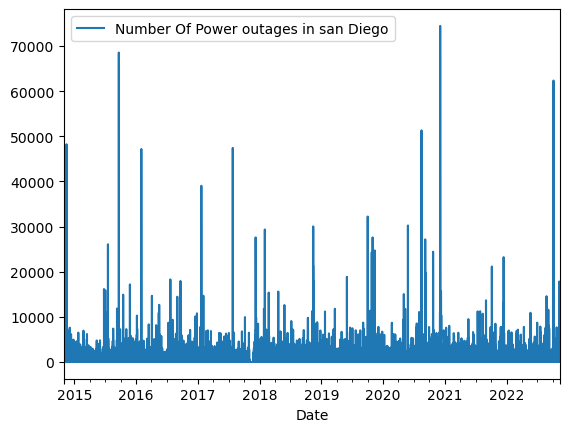

In [154]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline
series.plot(label="Number Of Power outages in san Diego")
plt.legend();

In [155]:
from darts.dataprocessing.transformers import Scaler

In [156]:
dfn=dfn.reset_index()

In [157]:
scalerp=Scaler()

In [158]:
import pandas as pd
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

In [161]:

# Convert the data into a TimeSeries object
series = TimeSeries.from_values(dfr)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [162]:
dfr

,Date,Highest_Outage
0,2014-11-01 06:00:00,377.0
1,2014-11-01 07:00:00,0.0
2,2014-11-01 08:00:00,0.0
3,2014-11-01 09:00:00,0.0
4,2014-11-01 10:00:00,0.0
...,...,...
70400,2022-11-12 14:00:00,0.0
70401,2022-11-12 15:00:00,22.0
70402,2022-11-12 16:00:00,25.0
70403,2022-11-12 17:00:00,25.0


In [163]:

# Create a new column 'date' containing only the date part of 'run_start_time'
dfr['date'] = dfr['Date'].dt.date

In [164]:
dfr

,Date,Highest_Outage,date
0,2014-11-01 06:00:00,377.0,2014-11-01
1,2014-11-01 07:00:00,0.0,2014-11-01
2,2014-11-01 08:00:00,0.0,2014-11-01
3,2014-11-01 09:00:00,0.0,2014-11-01
4,2014-11-01 10:00:00,0.0,2014-11-01
...,...,...,...
70400,2022-11-12 14:00:00,0.0,2022-11-12
70401,2022-11-12 15:00:00,22.0,2022-11-12
70402,2022-11-12 16:00:00,25.0,2022-11-12
70403,2022-11-12 17:00:00,25.0,2022-11-12


In [165]:
dfr.drop(columns=['Date'], inplace=True)

In [166]:
dfr

,Highest_Outage,date
0,377.0,2014-11-01
1,0.0,2014-11-01
2,0.0,2014-11-01
3,0.0,2014-11-01
4,0.0,2014-11-01
...,...,...
70400,0.0,2022-11-12
70401,22.0,2022-11-12
70402,25.0,2022-11-12
70403,25.0,2022-11-12


In [176]:

# Set the run_start_time column as the DataFrame index
dfr.set_index('date', inplace=True)

In [177]:
dfr

,Highest_Outage
date,
2014-11-01,377.0
2014-11-01,0.0
2014-11-01,0.0
2014-11-01,0.0
2014-11-01,0.0
...,...
2022-11-12,0.0
2022-11-12,22.0
2022-11-12,25.0


In [178]:
series=dfr.squeeze()

In [179]:
dfr=dfr.reset_index()

In [180]:
print(series)

date
2014-11-01    377.0
2014-11-01      0.0
2014-11-01      0.0
2014-11-01      0.0
2014-11-01      0.0
              ...  
2022-11-12      0.0
2022-11-12     22.0
2022-11-12     25.0
2022-11-12     25.0
2022-11-12     25.0
Name: Highest_Outage, Length: 70405, dtype: float64


In [181]:
dfr

,date,Highest_Outage
0,2014-11-01,377.0
1,2014-11-01,0.0
2,2014-11-01,0.0
3,2014-11-01,0.0
4,2014-11-01,0.0
...,...,...
70400,2022-11-12,0.0
70401,2022-11-12,22.0
70402,2022-11-12,25.0
70403,2022-11-12,25.0


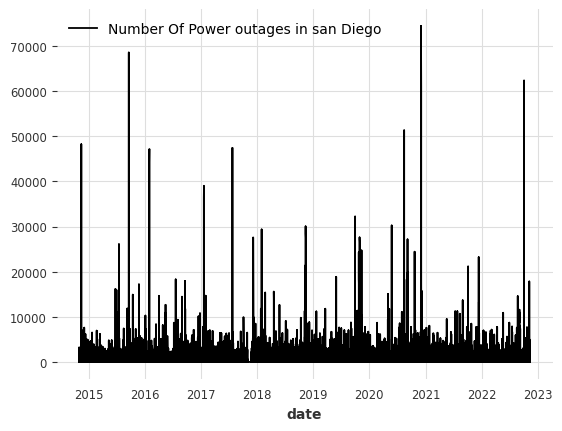

In [182]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline
series.plot(label="Number Of Power outages in san Diego")
plt.legend();

In [183]:
from darts.dataprocessing.transformers import Scaler

In [184]:
dfn=dfn.reset_index()

In [185]:
scalerp=Scaler()

In [186]:
import pandas as pd
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

In [188]:

# Convert the data into a TimeSeries object
series = TimeSeries.from_values(dfn)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

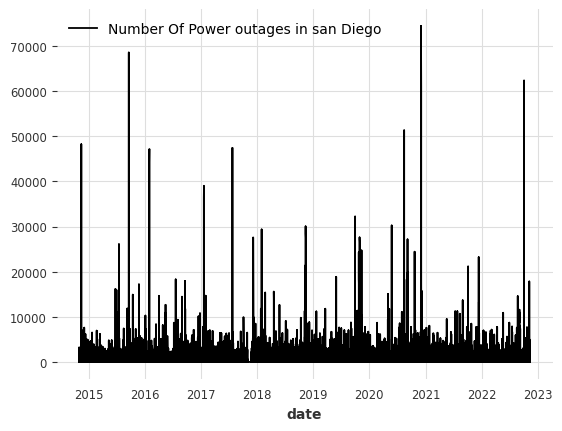

In [173]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline
series.plot(label="Number Of Power outages in san Diego")
plt.legend();

In [174]:
from darts.dataprocessing.transformers import Scaler